In [2]:
import os
import sys
import random
import warnings

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook, tnrange

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [3]:
train_image_dir = 'data/tgs-kaggle/train/images/'
train_mask_dir = 'data/tgs-kaggle/train/masks/'

In [4]:
train_images_filenames = os.listdir(train_image_dir)
len(train_images_filenames), train_images_filenames

(7,
 ['0c089f7c1b.png',
  '0a19821a16.png',
  '0a1742c740.png',
  '0c62ed4494.png',
  '0c376f6728.png',
  '0bdd44d530.png',
  '0c6ec35477.png'])

In [5]:
train_masks_filenames = os.listdir(train_mask_dir)
len(train_masks_filenames), train_masks_filenames

(7,
 ['0c089f7c1b.png',
  '0a19821a16.png',
  '0a1742c740.png',
  '0c62ed4494.png',
  '0c376f6728.png',
  '0bdd44d530.png',
  '0c6ec35477.png'])

In [6]:
imageSize= 150
imgChannel = 1

train_path = 'data/tgs-kaggle/train'

In [7]:
# Create  containers for images and masks
X_train = np.zeros((len(train_images_filenames), imageSize, imageSize, imgChannel), dtype=np.uint8)
Y_train = np.zeros((len(train_masks_filenames), imageSize, imageSize, 1), dtype=np.bool)

In [8]:
print('Resizing train images and masks and converting them into numpy arrays ... ')

for n, id_ in tqdm_notebook(enumerate(train_images_filenames), total=len(train_images_filenames)):
    path= 'data/tgs-kaggle/train'
    img = load_img(train_path + '/images/' + id_)
    x = img_to_array(img)[:,:,1]
    x = resize(x, (imageSize, imageSize, 1), mode='constant', preserve_range=True)
    X_train[n] = x
    mask = img_to_array(load_img(train_path + '/masks/' + id_))[:,:,1]
    Y_train[n] = resize(mask, (imageSize, imageSize, 1), mode='constant', preserve_range=True)

print('Done!')

Resizing train images and masks and converting them into numpy arrays ... 



Done!


In [9]:
X_train.shape

(7, 150, 150, 1)

In [10]:
Y_train.shape

(7, 150, 150, 1)

In [11]:
ix = random.randint(0, len(train_images_filenames))
ix

5

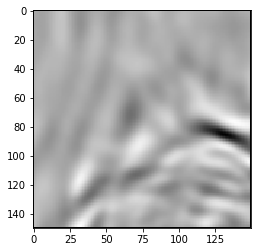

In [12]:
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()

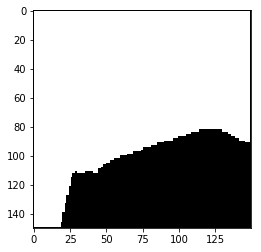

In [13]:
tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()

___

### Saving images and masks into numpy files

In [14]:
images = np.save("npy/images.npy", X_train)
masks = np.save("npy/masks.npy", Y_train)

### Loading images and masks into numpy files

In [15]:
images = np.load("npy/images.npy")
masks = np.load("npy/masks.npy")

In [16]:
print(len(images))

7


In [17]:
print(len(masks))

7


### Show some images and masks randomly

In [18]:
ix = random.randint(0, len(train_images_filenames))
ix

6

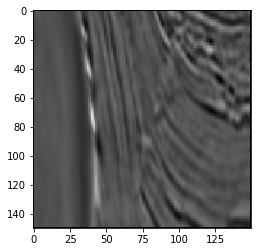

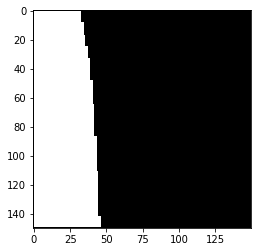

In [19]:
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()


tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()

### Show a specific image and mask

In [20]:
ix = 2

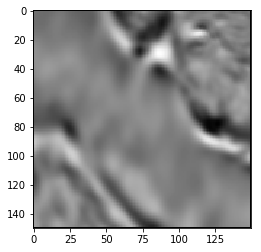

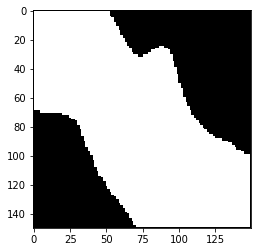

In [21]:
plt.imshow(np.dstack((X_train[ix],X_train[ix],X_train[ix])))
plt.show()


tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()